In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import hmp
import mne
from hmp import simulations
from scipy.stats import gamma
import pandas as pd
import seaborn as sns

## Illustrating the simulations

In [2]:
def epoching(data, events, event_id):
    data.load_data()
    data.set_eeg_reference('average')
    epochs = mne.Epochs(data, events = events, event_id=event_id, 
                        tmin = -0.25, tmax=3)
    return epochs

source_index = simulations.available_sources()[[34,47,21,44]]

amplitude = 1e-6
shape = 2 #shape of the gamma distribution
frequency = 10 #half-sine
sfreq = 500 #sampling frequency
n_trials = 200
Nevents = 4
means = np.array([100,100,100,100])/shape #Mean duration of the stages in ms
names = source_index[:Nevents] #Which source to activate at each stage (see atlas when calling simulations.available_sources())
sources = []
for source in zip(names, means): #One source = one frequency, one amplitude and a given by-trial variability distribution
    sources.append([source[0], frequency, amplitude, gamma(shape, scale=source[1])])

file = simulations.simulate(sources, n_trials, 5, 'simulated/%s'%amplitude, 
                            sfreq=sfreq, overwrite=False, noise=True, save_snr=True, seed=4, save_noiseless=True)

#Recover info from simulation
generating_events = np.load(file[1])
resp_trigger = int(np.max(np.unique(generating_events[:,2])))#Resp trigger is the last source in each trial
event_id = {'stimulus':1}#trigger 1 = stimulus
resp_id = {'response':resp_trigger}#Response is defined as the last trigger in a sequence of events
#Keeping only stimulus and response triggers
events = generating_events[(generating_events[:,2] == 1) | (generating_events[:,2] == resp_trigger)]#only retain stimulus and response triggers

#Loading for visualization of the raw simulated EEG data
raw_noiseless = mne.io.read_raw_fif(file[-1], preload=False, verbose=False)
epochs_noiseless = epoching(raw_noiseless, events, event_id)
epochs_noiseless.load_data()
raw = mne.io.read_raw_fif(file[0], preload=False, verbose=False)
epochs = epoching(raw, events, event_id)
snr = np.load(file[2])

# Feeding data and initialize HMP
epoch_data = hmp.utils.read_mne_data(file[0], event_id=event_id, resp_id=resp_id, 
                       sfreq=sfreq, events_provided=events, verbose=False)
hmp_data = hmp.utils.transform_data(epoch_data, apply_standard=False, n_comp=5)
init = hmp.models.hmp(hmp_data, sfreq=sfreq)#Initialization of the model
#Recovering true times and parameters for comparison
random_source_times, true_pars, true_amplitudes, true_activities = simulations.simulated_times_and_parameters(generating_events, init)
random_source_times_cs = random_source_times.cumsum(axis=1)

#Info object for MNE for plotting purposes
info = simulations.simulation_info()
all_other_chans = range(len(info.ch_names[:-61]))#non-eeg
chan_list = list(np.arange(len(info.ch_names)))
chan_list = [e for e in chan_list if e not in all_other_chans]
chan_list.pop(52)#Bad elec
info = mne.pick_info(info, sel=chan_list)

Simulating ./simulated/1e-06_raw.fif
Overwriting existing file.
Writing /home/gweindel/owncloud/projects/RUGUU/man_hmp/results/simulations/simulated/1e-06_noiseless_raw.fif
Closing /home/gweindel/owncloud/projects/RUGUU/man_hmp/results/simulations/simulated/1e-06_noiseless_raw.fif
[done]
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>
Overwriting existing file.
Writing /home/gweindel/owncloud/projects/RUGUU/man_hmp/results/simulations/simulated/1e-06_raw.fif
Closing /home/gweindel/owncloud/projects/RUGUU/man_hmp/results/simulations/simulated/1e-06_raw.fif
[done]
./simulated/1e-06_raw.fif simulated
Reading 0 ... 702693  =      0.000 ...  1405.386 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a cus

/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/mne/epochs.py:2986: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  metadata.iloc[:, 0] = ""
/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/hmp/utils.py:259: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data_epoch = epochs.get_data()#preserves index
/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/hmp/utils.py:657: UserWarning: The `squeeze` kwarg to GroupBy is being removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this warning.
  for i,trial_dat in data.stack(trial=("participant", "epochs")).drop_duplicates('trial').groupby('trial'):


200 trials were retained for participant ./simulated/1e-06_raw.fif


/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/hmp/utils.py:700: UserWarning: The `squeeze` kwarg to GroupBy is being removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this warning.
  data = data.stack(participant_comp=[participants_variable,'component']).groupby('participant_comp').map(zscore_xarray).unstack()


Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>
NOTE: pick_types() is a le

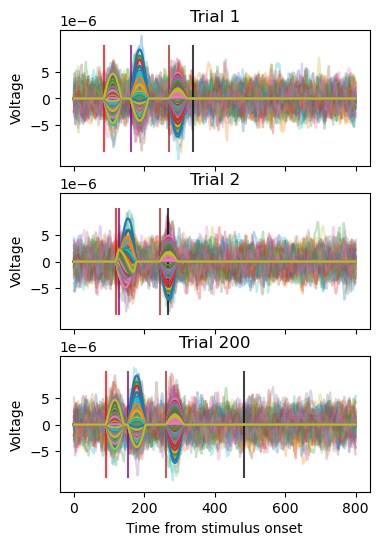

In [3]:
fig, ax = plt.subplots(3,1, figsize=(4,6), dpi=100, sharex=True, sharey=True)

for i,trial in enumerate([0,1,199]):
    ax[i].plot(np.linspace(0,800,400),epochs_noiseless[trial].average().pick_types(eeg=True).get_data().T[125:525], zorder=10)
    ax[i].plot(np.linspace(0,800,400),epochs[trial].average().pick_types(eeg=True).get_data().T[125:525], alpha=.3)
    ax[i].set_ylabel('Voltage')
    ax[i].set_yticks([-5e-6,0,5e-6])
    ev_colors = iter(['red', 'purple','brown','black'])
    for event in range(Nevents):
        ev_c = next(ev_colors)
        ax[i].vlines(random_source_times_cs[trial,event]*2, ymin=1e-5, ymax=-1e-5, color=ev_c, alpha=.75) 
    ax[i].set_title('Trial %i'%(trial+1))
    i += 1
ax[2].set_xlabel('Time from stimulus onset')

plt.savefig('../../plots/ERPs_all_elec_1e-6.png',dpi=300,transparent=True,bbox_inches='tight')

  0%|          | 0/198 [00:00<?, ?it/s]

Transition event 1 found around sample 64
Transition event 2 found around sample 115
Transition event 3 found around sample 160
Estimating 3 events model
parameters estimated for 3 events model


/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/hmp/visu.py:93: FutureWarning: mne.io.meas_info.Info is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
  from mne.io.meas_info import Info


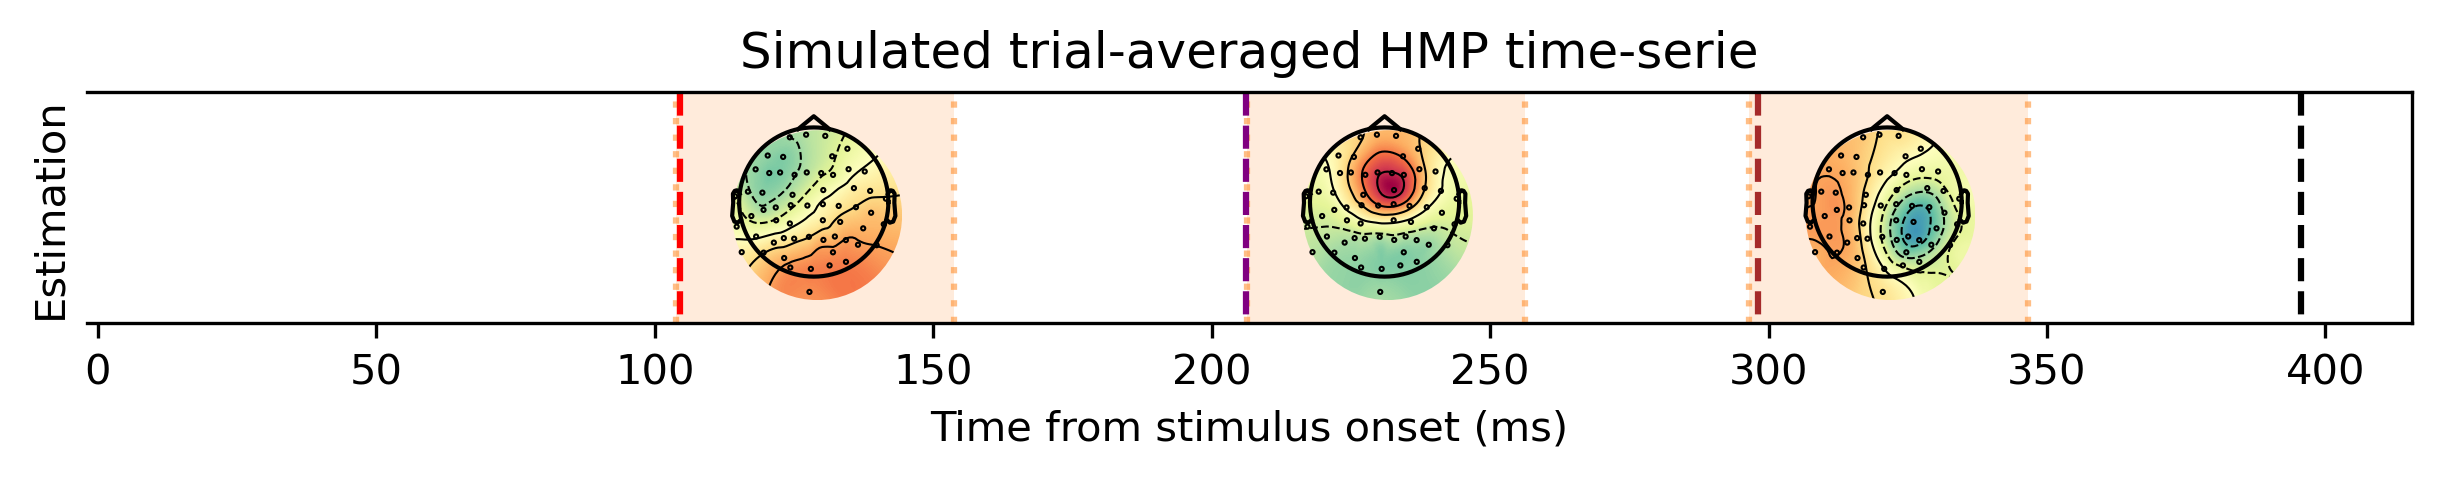

In [4]:
fig, ax = plt.subplots(1,1, figsize=(10,1),sharex=True, dpi=300)

estimates = init.fit()
hmp.visu.plot_topo_timecourse(epoch_data, estimates, info, init, magnify=2, ax=ax, sensors=True, as_time=True, 
    times_to_display = np.mean(np.cumsum(random_source_times,axis=1),axis=0), colorbar=False, cmap='Spectral_r', vmin=-7e-6,vmax=7e-6,
                             linecolors=['red', 'purple','brown','black'])

ax.set_title('Simulated trial-averaged HMP time-serie')
ax.set_ylabel('Estimation')

ax.set_xlabel('Time from stimulus onset (ms)')
plt.savefig('../../plots/hestimation.png',dpi=600,transparent=True,bbox_inches='tight')
plt.show()

Estimating 2 events model with 1 starting point(s)
parameters estimated for 2 events model


/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/scipy/stats/_resampling.py:630: RuntimeWarning: Mean of empty slice
  theta_hat_b.append(statistic(*resampled_data, axis=-1))
/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/scipy/stats/_resampling.py:130: RuntimeWarning: Mean of empty slice
  theta_hat_i.append(statistic(*broadcasted, axis=-1))
/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/hmp/visu.py:1091: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  test_boot = stats.bootstrap((data[:,event,:],), statistic=np.nanmean, n_resamples=bootstrap, axis=0, batch=10)


Estimating 2 events model with 1 starting point(s)
parameters estimated for 2 events model


/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/scipy/stats/_resampling.py:630: RuntimeWarning: Mean of empty slice
  theta_hat_b.append(statistic(*resampled_data, axis=-1))
/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/scipy/stats/_resampling.py:130: RuntimeWarning: Mean of empty slice
  theta_hat_i.append(statistic(*broadcasted, axis=-1))
/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/hmp/visu.py:1091: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  test_boot = stats.bootstrap((data[:,event,:],), statistic=np.nanmean, n_resamples=bootstrap, axis=0, batch=10)


Estimating 2 events model with 1 starting point(s)
parameters estimated for 2 events model


/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/scipy/stats/_resampling.py:630: RuntimeWarning: Mean of empty slice
  theta_hat_b.append(statistic(*resampled_data, axis=-1))
/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/scipy/stats/_resampling.py:130: RuntimeWarning: Mean of empty slice
  theta_hat_i.append(statistic(*broadcasted, axis=-1))
/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/hmp/visu.py:1091: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  test_boot = stats.bootstrap((data[:,event,:],), statistic=np.nanmean, n_resamples=bootstrap, axis=0, batch=10)


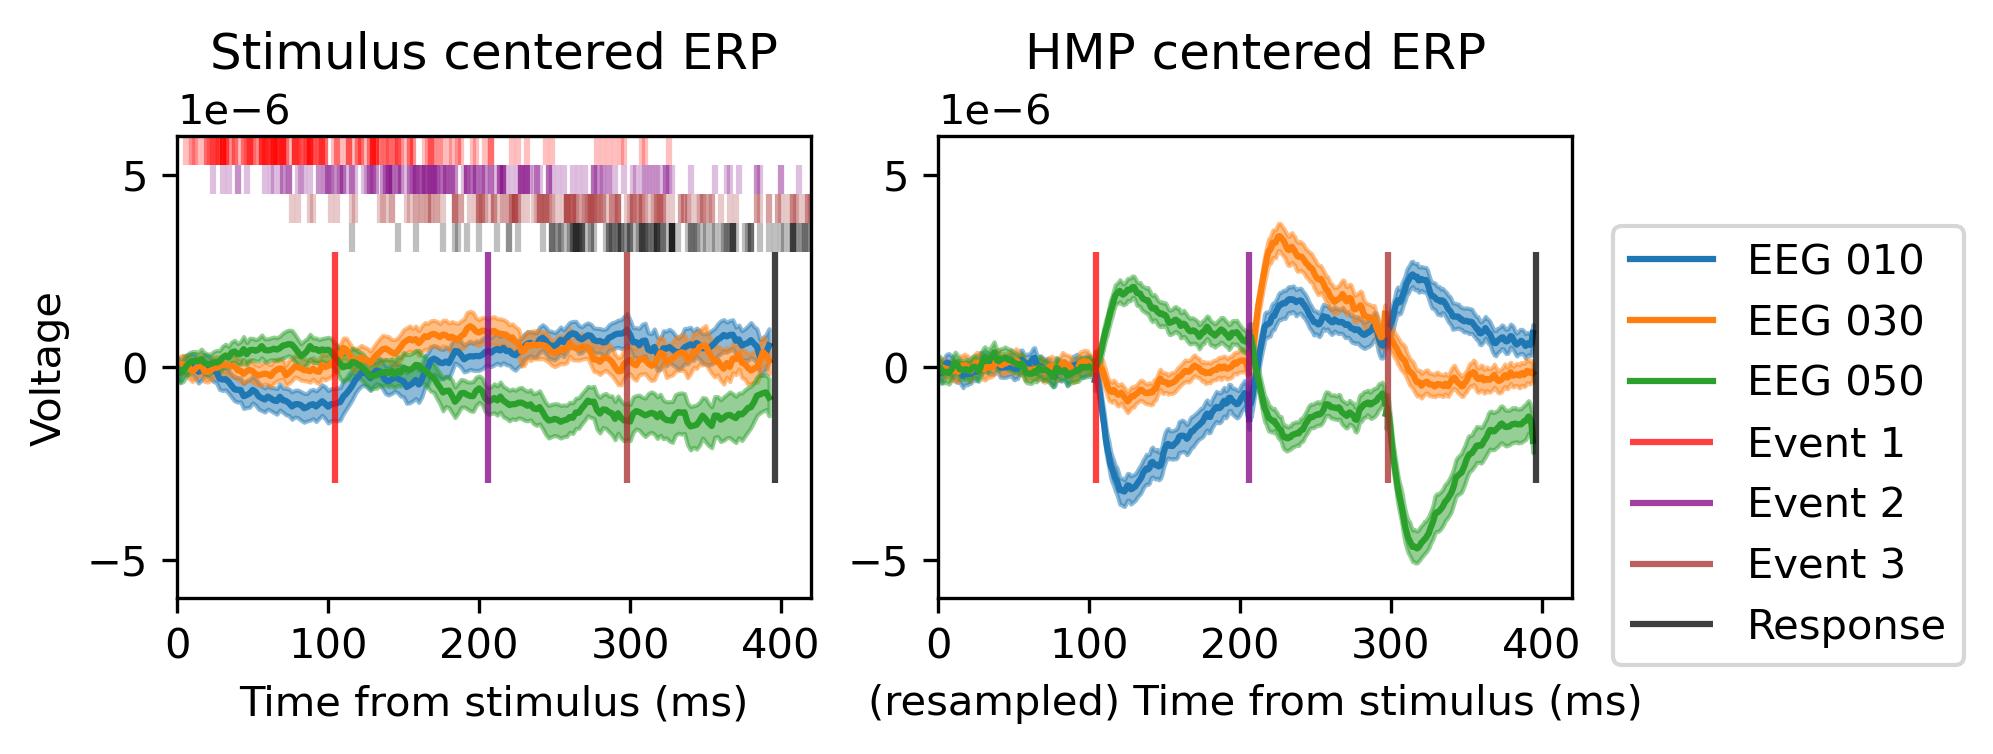

In [5]:
channel = 'EEG 055'

fig, ax = plt.subplots(1,2, figsize=(6,2), sharey=False, sharex=True, dpi=300)
colors = iter([plt.cm.tab10(i) for i in range(10)])


for channel in  ['EEG 010', 'EEG 030', 'EEG 050']:
    c = next(colors)
    fakefit = init.fit_single(2, maximization=False)#Just to get the stim ERP in the same format
    BRP_times = init.compute_times(init, fakefit, fill_value=0, add_rt=True)
    times = BRP_times.sel(event=[0,3])#Stim and response only
    times['event'] = [0,1]
    test = hmp.visu.erp_data(epoch_data.stack(trial_x_participant=["participant","epochs"]), times, channel)
    hmp.visu.plot_erp(times, test, c, ax[0], upsample=2, label=channel, bootstrap=1000)
    BRP_times = init.compute_times(init, estimates, fill_value=0, add_rt=True)#Real estimate
    test = hmp.visu.erp_data(epoch_data.stack(trial_x_participant=["participant","epochs"]), BRP_times, channel,100)
    hmp.visu.plot_erp(BRP_times, test, c, ax[1], upsample=2, bootstrap=1000)

ev_colors = iter(['red', 'purple','brown','black'])
labels = ['Event 1', 'Event 2', 'Event 3', 'Response']
for event in range(4):
    c = next(ev_colors)
    ax[0].vlines(random_source_times_cs[:,event]*2, ymin=6e-6-.75e-6*event, ymax=5.25e-6-.75e-6*event, color=c, alpha=.25) 
    ax[0].vlines(random_source_times_cs[:,event].mean()*2, ymin=-3e-6, ymax=3e-6, color=c, alpha=.75, label=labels[event])
    ax[1].vlines(random_source_times_cs[:,event].mean()*2, ymin=-3e-6, ymax=3e-6, color=c, alpha=.75, label=labels[event])

plt.xlim(0,420)
ax[0].set_ylim(-6e-6,6e-6)
plt.ylim(-6e-6,6e-6)
ax[0].set_ylabel('Voltage')
ax[0].set_xlabel('Time from stimulus (ms)')
ax[0].set_title('Stimulus centered ERP')
ax[0].legend(bbox_to_anchor=(2.85,.85))
ax[1].set_xlabel('(resampled) Time from stimulus (ms)')
ax[1].set_title('HMP centered ERP')
ax[0].set_yticks([5e-6,0,-5e-6])
ax[1].set_yticks([5e-6,0,-5e-6])
plt.savefig('../../plots/ERP.png',dpi=300,transparent=True,bbox_inches='tight')
plt.show()

/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/hmp/utils.py:1384: UserWarning: The `squeeze` kwarg to GroupBy is being removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this warning.
  for trial, trial_dat in data.groupby('trial_x_participant'):
/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/hmp/utils.py:1384: UserWarning: The `squeeze` kwarg to GroupBy is being removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this warning.
  for trial, trial_dat in data.groupby('trial_x_participant'):
/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/hmp/utils.py:1384: UserWarning: The `squeeze` kwarg to GroupBy is being removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this warning.
  for trial, trial_dat in data.groupby('trial_x_participant'):
/home/gweindel/miniconda3/envs/hmp2/lib/pyt

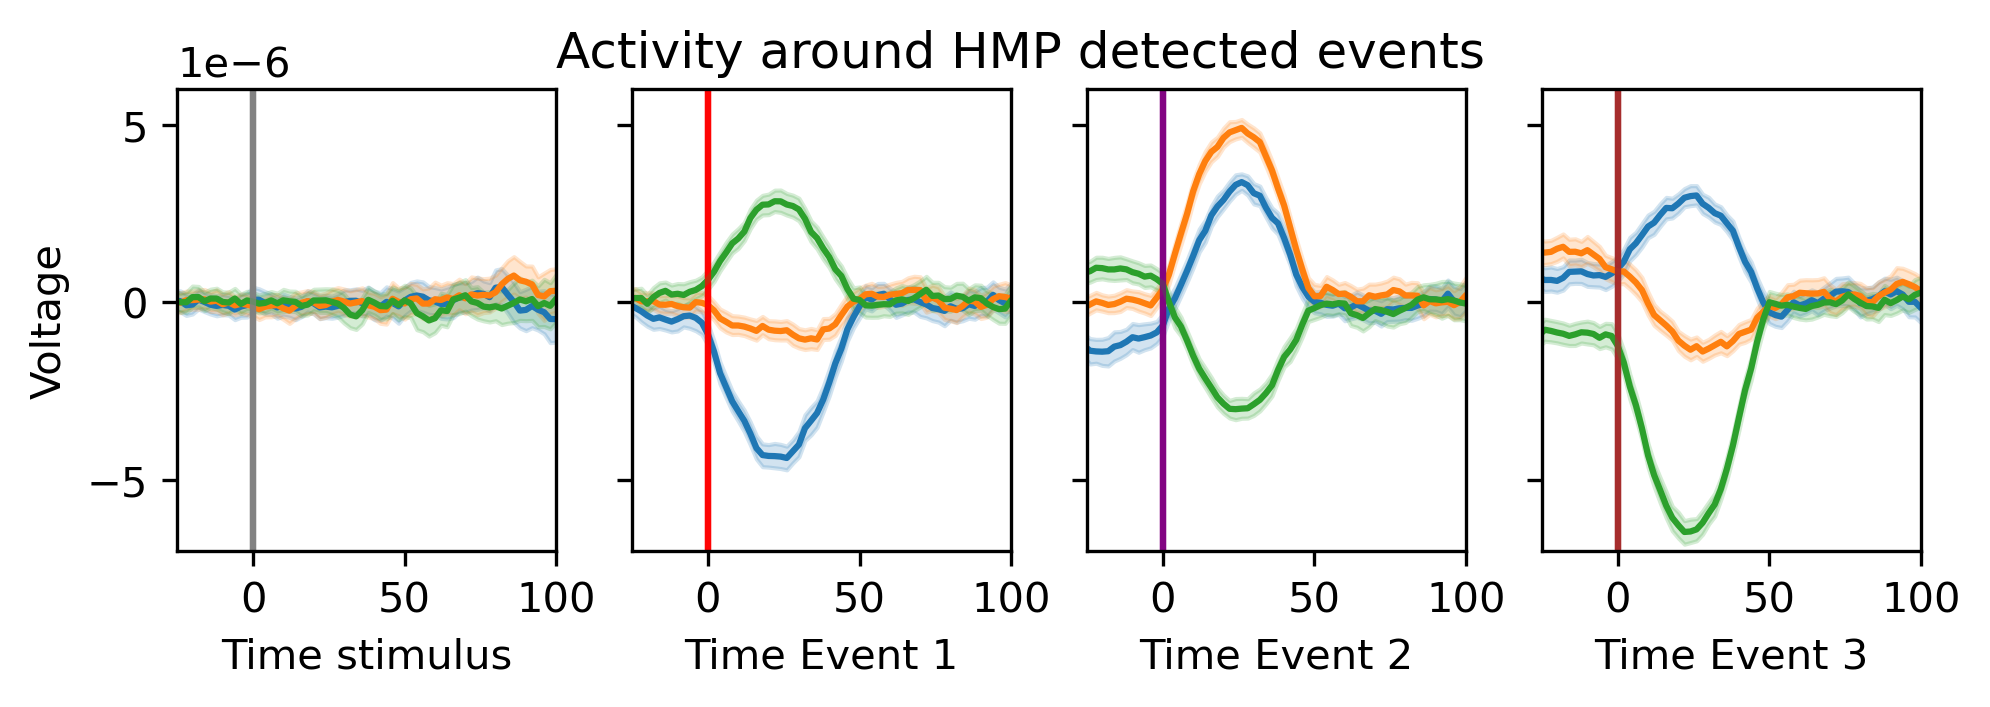

In [6]:
fig, ax = plt.subplots(1,4, figsize=(7.5,2), sharey=True, sharex=True, dpi=300)
colors = iter([plt.cm.tab10(i) for i in range(10)])

data_speed = epoch_data.stack({'trial_x_participant':['participant','epochs']}).data.dropna('trial_x_participant', how="all")
times_speed = init.compute_times(init, estimates.dropna('event'), fill_value=0, add_rt=True)
for channel in ['EEG 010', 'EEG 030', 'EEG 050']:
    c = next(colors)
    baseline = 25
    ev_colors = iter(['gray', 'red', 'purple','brown','black'])
    for stage in range(4):
        ev_c = next(ev_colors)
        bsl = baseline
        BRP = hmp.utils.event_times(data_speed, times_speed,channel,stage=stage, baseline = bsl)
        df = pd.DataFrame(BRP).melt(var_name='Time')
        df.Time -= bsl
        df.Time = df.Time*2
        sns.lineplot(x="Time", y="value", data=df,ax=ax[stage], color=c)
        ax[stage].vlines(0,-7e-6,7e-6, color=ev_c, alpha=.75)
        ax[stage].set_xlabel(f'Time Event {int(stage)}')
ax[0].set_xlabel('Time stimulus')
ax[0].set_ylabel(r'Voltage')
ax[0].set_yticks([5e-6,0,-5e-6])
plt.ylim(-7e-6,6e-6)
plt.xlim(-25,100)
plt.suptitle('Activity around HMP detected events')
plt.savefig('../../plots/HMP-locked_ERP_sim.png',dpi=300,transparent=True,bbox_inches='tight')

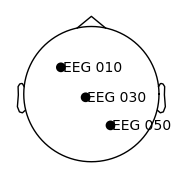

In [7]:
raw_pick = raw.copy().pick(['EEG 010','EEG 030', 'EEG 050'])
fig, ax = plt.subplots(1,1,figsize=(2.1,2.1))
mne.viz.plot_montage(raw_pick.info.get_montage(), scale_factor=2, axes=ax)
fig.savefig('../../plots/montage.png',dpi=300,transparent=True,bbox_inches='tight')

## Illustration of TPR/PPV

Estimating 2 events model with 1 starting point(s)
parameters estimated for 2 events model
Estimating 4 events model


/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/hmp/visu.py:93: FutureWarning: mne.io.meas_info.Info is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
  from mne.io.meas_info import Info


parameters estimated for 4 events model


/home/gweindel/miniconda3/envs/hmp2/lib/python3.11/site-packages/hmp/visu.py:93: FutureWarning: mne.io.meas_info.Info is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
  from mne.io.meas_info import Info


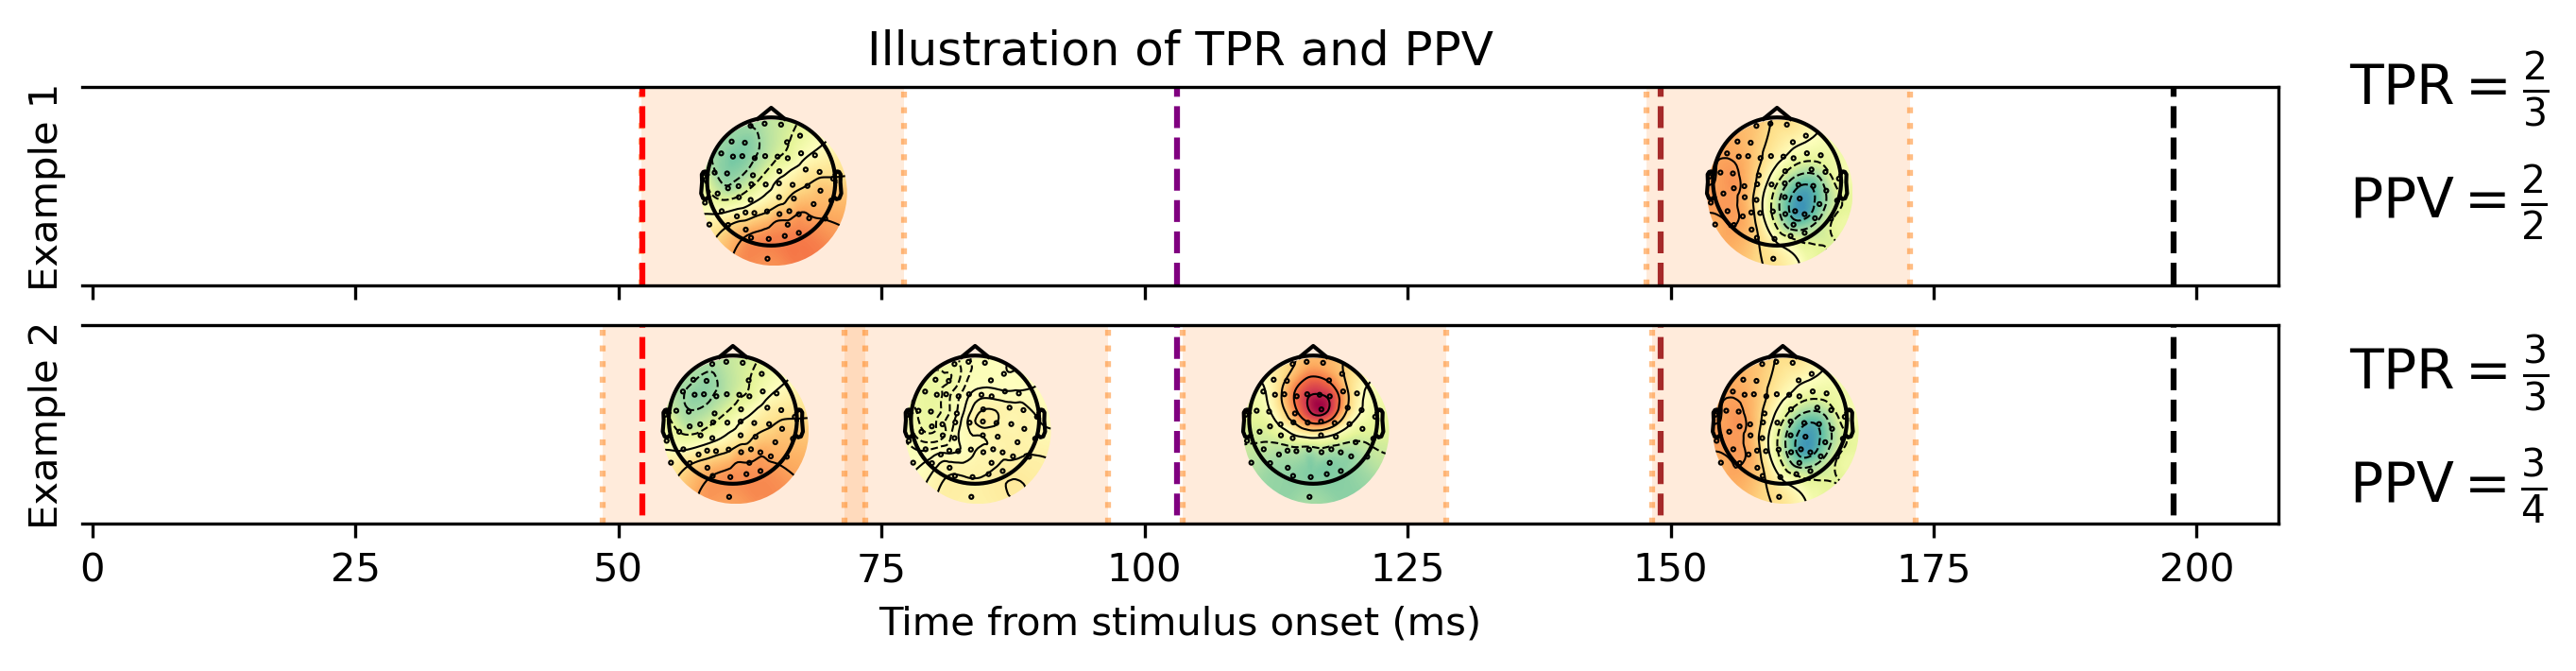

In [9]:
fig, ax = plt.subplots(2,1, figsize=(10,2),sharex=True, dpi=300)

under_estimates = init.fit_single(2)
hmp.visu.plot_topo_timecourse(epoch_data, under_estimates, info, init, magnify=2, ax=ax[0], sensors=True, 
    times_to_display = np.mean(np.cumsum(random_source_times,axis=1),axis=0), colorbar=False, cmap='Spectral_r', vmin=-7e-6,vmax=7e-6,
                             linecolors=['red', 'purple','brown','black'])
poor_parameters =  np.array([[2,50],[2,50],[2,50],[2,5],[2,50]])
poor_estimates = init.fit_single(4, parameters=poor_parameters)
hmp.visu.plot_topo_timecourse(epoch_data, poor_estimates, info, init, magnify=2, ax=ax[1], sensors=True, 
    times_to_display = np.mean(np.cumsum(random_source_times,axis=1),axis=0), colorbar=False, cmap='Spectral_r', vmin=-7e-6,vmax=7e-6,
                             linecolors=['red', 'purple','brown','black'])

ax[0].set_title('Illustration of TPR and PPV')
ax[0].set_ylabel('Example 1')
ax[1].set_ylabel('Example 2')


ax[1].set_xlabel('Time from stimulus onset (ms)')
plt.gcf().text(.925, .85, r'$\text{TPR} = \frac{2}{3}$', fontsize=14)
plt.gcf().text(.925, .65, r'$\text{PPV} = \frac{2}{2}$', fontsize=14)

plt.gcf().text(.925, 0.35, r'$\text{TPR} = \frac{3}{3}$', fontsize=14)
plt.gcf().text(.925, 0.15, r'$\text{PPV} = \frac{3}{4}$', fontsize=14)
plt.savefig('../../plots/hit_FA.png',dpi=600,transparent=True,bbox_inches='tight')
plt.show()